In [3]:
#1.Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 2. Load data

In [6]:
data = pd.read_csv('Countries-exercise.csv')
data.head(50)


,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [7]:
data.shape

(241, 3)

In [8]:
X = data.iloc[:, 1:3]
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [9]:
X.shape

(241, 2)

In [10]:
X = np.array(X)

In [11]:
X.shape

(241, 2)

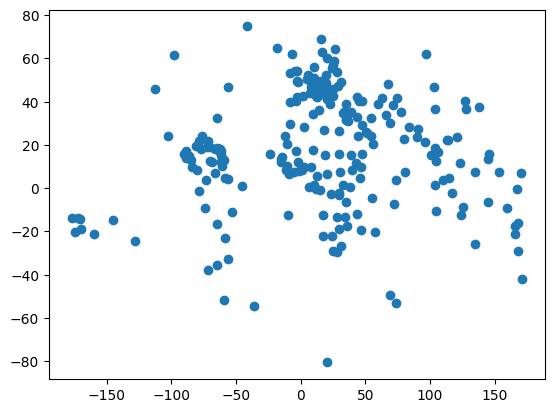

In [12]:
plt.scatter(X[:,0], X[:,1])

In [13]:
# 3 Choose K centroids

In [14]:
def initialize_K_centroids(X, K):
    m,n = X.shape
    k_rand = np.ones((K, n))
    k_rand = X[np.random.choice(range(len(X)), K, replace=False),:]
    return k_rand

In [15]:
centroids_init = initialize_K_centroids(X, 4)

In [16]:
centroids_init

array([[-172.1648506 ,  -13.75324346],
       [  28.22723131,  -29.58003188],
       [  90.23812743,   23.86731158],
       [ -98.30777028,   61.36206324]])

In [17]:
# 4 Compute distances

In [18]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        c[i] = np.argmin(distances)
    return c

In [19]:
idx = find_closest_centroids(X, centroids_init)
idx

array([3., 2., 1., 3., 1., 2., 1., 2., 1., 2., 0., 1., 2., 1., 3., 2., 1.,
       2., 1., 1., 1., 1., 2., 2., 2., 3., 3., 1., 3., 2., 3., 3., 3., 1.,
       3., 2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 0., 3., 1., 1., 3.,
       3., 3., 3., 2., 2., 2., 1., 1., 3., 2., 3., 1., 3., 1., 1., 1., 2.,
       1., 2., 2., 1., 1., 3., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       3., 3., 3., 2., 3., 2., 1., 3., 1., 3., 2., 2., 1., 2., 2., 2., 1.,
       2., 2., 3., 2., 1., 3., 1., 2., 2., 2., 2., 1., 2., 2., 1., 3., 2.,
       2., 2., 2., 2., 1., 1., 3., 1., 2., 1., 2., 1., 2., 2., 3., 1., 1.,
       2., 1., 2., 3., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 3., 1., 1.,
       2., 1., 2., 1., 2., 1., 3., 0., 1., 2., 2., 2., 2., 2., 2., 3., 0.,
       3., 2., 2., 2., 2., 3., 2., 1., 1., 2., 0., 2., 2., 2., 1., 1., 2.,
       1., 1., 1., 2., 1., 1., 2., 1., 3., 1., 1., 1., 3., 2., 1., 3., 2.,
       1., 2., 1., 3., 1., 2., 3., 1., 1., 2., 2., 2., 2., 0., 3., 1., 2.,
       2., 1., 1., 2., 1.

In [20]:
# 5 Update centroids

In [21]:
def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points_belong_k = X[np.where(idx == k)]
        centroids[k] = np.mean(points_belong_k, axis=0,)
    return centroids

In [22]:
centroids = compute_means(X, idx, 4)
centroids

array([[-162.24003412,  -17.71618937],
       [   9.16722564,   10.3806426 ],
       [  78.00475451,   26.06025866],
       [ -69.05302667,   19.61499455]])

In [23]:
# 6 

In [24]:
def find_k_means(X, K, max_iters=10):
    _, n = X.shape
    centroids = initialize_K_centroids(X, K) 
    centroid_history = np.zeros((max_iters, K, n))
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
    
    return centroids, idx

In [25]:
centroids, idx = find_k_means(X, 4)

In [26]:
centroids

array([[ 17.95429274,  25.71040971],
       [-82.03484643,   5.55229685],
       [151.78560976,  -5.88867027],
       [ 90.34244606,  17.71764573]])

In [27]:
idx

array([1., 3., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 2., 3., 1., 2., 0.,
       0., 0., 0., 0., 0., 3., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 3., 3., 0., 0., 0., 1., 3., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 2., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 2., 1., 3., 3., 1., 0., 1., 0., 3., 0., 3., 3., 3., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 2., 3., 3., 0., 3., 3., 1., 1., 3.,
       0., 0., 3., 0., 0., 0., 1., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0.,
       0., 0., 3., 1., 2., 0., 0., 0., 3., 0., 3., 2., 0., 0., 1., 3., 0.,
       3., 0., 2., 0., 2., 0., 1., 1., 0., 0., 3., 2., 2., 3., 3., 1., 1.,
       1., 3., 2., 2., 0., 1., 3., 0., 1., 0., 1., 0., 0., 3., 0., 0., 0.,
       0., 0., 0., 3., 1., 0., 2., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 3., 0., 1., 0., 0., 3., 3., 3., 2., 1., 1., 0., 0.,
       3., 0., 0., 0., 1.